In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tophu
from scipy import signal
from numpy.typing import ArrayLike, NDArray

def amp2db(x: ArrayLike) -> NDArray:
    return 20.0 * np.log10(x)

def plot_response(coeffs: ArrayLike, wp: float, ws: float) -> None:
    w, h = signal.freqz(coeffs, fs=1.0)
    db = amp2db(np.abs(h))
    with plt.style.context("seaborn-talk"), plt.style.context("seaborn-whitegrid"):
        _, ax = plt.subplots(figsize=(6, 4))
        ax.plot(w, db)
        for w in [wp, ws]:
            ax.axvline(w, color="black", linestyle="--", alpha=0.5)
        ax.set_ylim([-110, 5.5])
        ax.set_xlabel("Normalized Frequency")
        ax.set_ylabel("Gain (dB)")
        plt.tight_layout()
        plt.show()

def check_filter_response_old(
    downsample_factor: int,
    shape_factor: float,
    overhang: float = 0.5,
    ripple: float = 0.01,
    attenuation: float = 40.0,
) -> None:
    ratio = 1.0 / downsample_factor
    bandwidth = ratio / (1.0 - overhang * (shape_factor - 1.0))
    print(f"{bandwidth = }")
    coeffs = tophu.bandpass_equiripple_filter(
        bandwidth=bandwidth,
        shape=shape_factor,
        ripple=ripple,
        attenuation=attenuation,
        force_odd_length=True,
    )
    wp = 0.5 * bandwidth
    ws = shape_factor * wp
    plot_response(coeffs, wp, ws)

def check_filter_response_new(
    downsample_factor: int,
    shape_factor: float,
    overhang: float = 0.5,
    ripple: float = 0.01,
    attenuation: float = 40.0,
) -> None:
    ratio = 1.0 / downsample_factor
    bandwidth = ratio / (shape_factor + overhang - shape_factor * overhang)
    print(f"{bandwidth = }")
    coeffs = tophu.bandpass_equiripple_filter(
        bandwidth=bandwidth,
        shape=shape_factor,
        ripple=ripple,
        attenuation=attenuation,
        force_odd_length=True,
    )
    wp = 0.5 * bandwidth
    ws = shape_factor * wp
    plot_response(coeffs, wp, ws)


bandwidth = 0.6666662222225186


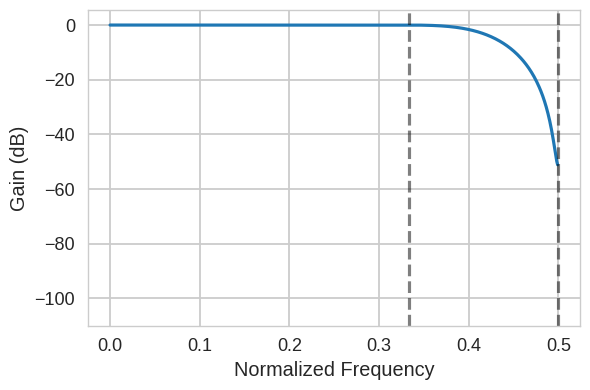

bandwidth = 0.400000160000064


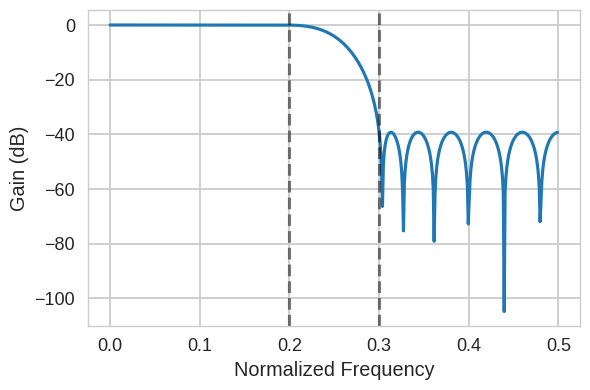

In [25]:
check_filter_response_old(
    downsample_factor=2,
    shape_factor=1.5 - 1e-6,
)
check_filter_response_new(
    downsample_factor=2,
    shape_factor=1.5 - 1e-6,
)